In [1]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort 
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import cv2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DIR = r'/content/drive/MyDrive/dl_project_dataset/images'

In [ ]:
train = pd.read_csv(r"/content/drive/MyDrive/dl_project_dataset/train.csv")
test = pd.read_csv(r"/content/drive/MyDrive/dl_project_dataset/test.csv")

In [ ]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [ ]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


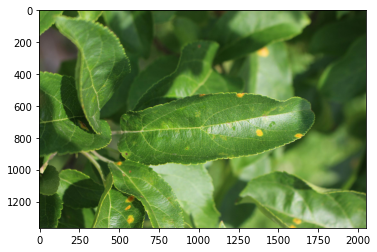

In [ ]:
img1 = Image.open(r'/content/drive/MyDrive/dl_project_dataset/images/Test_0.jpg')
plt.imshow(img1)
plt.show()

In [ ]:
class_names = train.loc[:,'healthy':].columns
print(class_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [ ]:
number = 0
train['label']=0
for i in class_names:
  train['label'] = train['label'] + train[i] * number
  number=number+1

In [ ]:
train

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0
...,...,...,...,...,...,...
1816,Train_1816,0,0,0,1,3
1817,Train_1817,1,0,0,0,0
1818,Train_1818,1,0,0,0,0
1819,Train_1819,0,0,1,0,2


In [ ]:
#preparing training data
DIR


'/content/drive/MyDrive/dl_project_dataset/images'

In [ ]:
natsort.natsorted(os.listdir(DIR))

['Test_0.jpg',
 'Test_1.jpg',
 'Test_2.jpg',
 'Test_3.jpg',
 'Test_4.jpg',
 'Test_5.jpg',
 'Test_6.jpg',
 'Test_7.jpg',
 'Test_8.jpg',
 'Test_9.jpg',
 'Test_10.jpg',
 'Test_11.jpg',
 'Test_12.jpg',
 'Test_13.jpg',
 'Test_14.jpg',
 'Test_15.jpg',
 'Test_16.jpg',
 'Test_17.jpg',
 'Test_18.jpg',
 'Test_19.jpg',
 'Test_20.jpg',
 'Test_21.jpg',
 'Test_22.jpg',
 'Test_23.jpg',
 'Test_24.jpg',
 'Test_25.jpg',
 'Test_26.jpg',
 'Test_27.jpg',
 'Test_28.jpg',
 'Test_29.jpg',
 'Test_30.jpg',
 'Test_31.jpg',
 'Test_32.jpg',
 'Test_33.jpg',
 'Test_34.jpg',
 'Test_35.jpg',
 'Test_36.jpg',
 'Test_37.jpg',
 'Test_38.jpg',
 'Test_39.jpg',
 'Test_40.jpg',
 'Test_41.jpg',
 'Test_42.jpg',
 'Test_43.jpg',
 'Test_44.jpg',
 'Test_45.jpg',
 'Test_46.jpg',
 'Test_47.jpg',
 'Test_48.jpg',
 'Test_49.jpg',
 'Test_50.jpg',
 'Test_51.jpg',
 'Test_52.jpg',
 'Test_53.jpg',
 'Test_54.jpg',
 'Test_55.jpg',
 'Test_56.jpg',
 'Test_57.jpg',
 'Test_58.jpg',
 'Test_59.jpg',
 'Test_60.jpg',
 'Test_61.jpg',
 'Test_62.jpg',
 '

In [ ]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [ ]:
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)
        
        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'/content/drive/MyDrive/dl_project_dataset/images/train/healthy')
            
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'/content/drive/MyDrive/dl_project_dataset/images/train/multiple_disease')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'/content/drive/MyDrive/dl_project_dataset/images/train/rust')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'/content/drive/MyDrive/dl_project_dataset/images/train/scab')
                
        elif search("Test",img):
            shutil.copy(path,r'/content/drive/MyDrive/dl_project_dataset/images/test')

In [ ]:
shutil.os.mkdir(r'/content/drive/MyDrive/dl_project_dataset/images/train')
shutil.os.mkdir(r'/content/drive/MyDrive/dl_project_dataset/images/train/healthy')
shutil.os.mkdir(r'/content/drive/MyDrive/dl_project_dataset/images/train/multiple_disease')
shutil.os.mkdir(r'/content/drive/MyDrive/dl_project_dataset/images/train/rust')
shutil.os.mkdir(r'/content/drive/MyDrive/dl_project_dataset/images/train/scab')
shutil.os.mkdir(r'/content/drive/MyDrive/dl_project_dataset/images/test')

In [ ]:
train_dir=create_train_data()

100%|██████████| 3644/3644 [00:57<00:00, 63.81it/s]


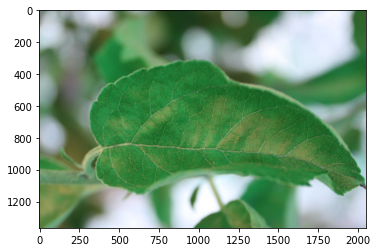

In [ ]:
Train_DIR=r'/content/drive/MyDrive/dl_project_dataset/images/train'
Categories=['healthy','multiple_disease','rust','scab']

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break

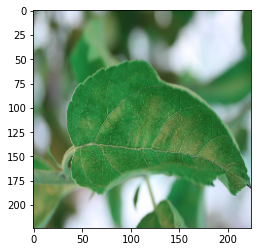

In [ ]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D

In [ ]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)

train_datagen=datagen.flow_from_directory(r'/content/drive/MyDrive/dl_project_dataset/images/train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'/content/drive/MyDrive/dl_project_dataset/images/train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')

Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [ ]:
checkpoint=ModelCheckpoint(r'/content/drive/MyDrive/dl_project_dataset/models/apple2.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [ ]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=40,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                 callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/40
91/91 [==============================] - ETA: 0s - loss: 1.2610 - accuracy: 0.3599
Epoch 00001: val_loss improved from inf to 1.30615, saving model to /content/drive/MyDrive/dl_project_dataset/models/apple2.h5
91/91 [==============================] - 100s 1s/step - loss: 1.2610 - accuracy: 0.3599 - val_loss: 1.3061 - val_accuracy: 0.4403
Epoch 2/40
91/91 [==============================] - ETA: 0s - loss: 1.1257 - accuracy: 0.4736
Epoch 00002: val_loss improved from 1.30615 to 1.04487, saving model to /content/drive/MyDrive/dl_project_dataset/models/apple2.h5
91/91 [==============================] - 97s 1s/step - loss: 1.1257 - accuracy: 0.4736 - val_loss: 1.0449 - val_accuracy: 0.5256
Epoch 3/40
91/91 [==============================] - ETA: 0s - loss: 0.8874 - accuracy: 0.6040
Epoch 00003: val_loss improved from 1.04487 to 0.77675, saving model to /content/drive/MyDrive/dl_project_dataset/models/apple2.h5
91/91 [==============================] - 96s 1s/step - loss: 0.8874 - 

In [ ]:
model.save('/content/drive/MyDrive/dl_project_dataset/new_model/newmodel.h5')

In [6]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/dl_project_dataset/models/apple2.h5')
new_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

[[2.6156381e-03 1.6902871e-02 7.7020499e-04 9.7971123e-01]]
3


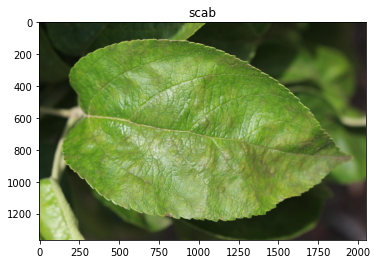

In [17]:
# test_image=r'/content/drive/MyDrive/dl_project_dataset/images/train/healthy/Train_2.jpg'
# test_image=r'/content/drive/MyDrive/dl_project_dataset/images/train/rust/Train_3.jpg'
# test_image=r'/content/drive/MyDrive/dl_project_dataset/images/train/multiple_disease/Train_6.jpg'
test_image=r'/content/drive/MyDrive/dl_project_dataset/images/train/scab/Train_8.jpg'



image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=new_model.predict(test_image)
print(result)
print(np.argmax(result))
Categories=['healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()

In [ ]:
pip install flask-ngrok

In [ ]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
from flask import Flask,render_template
from flask_ngrok import run_with_ngrok

In [ ]:
app = Flask(__name__,template_folder='/content/drive/MyDrive/templates')
run_with_ngrok(app)   
  
@app.route("/")
def home():
  np.set_printoptions(suppress=True)
  model = tensorflow.keras.models.load_model('/content/drive/MyDrive/dl_project_dataset/models/apple2.h5')
  data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

  
  test_image=r'/content/drive/MyDrive/dl_project_dataset/images/train/healthy/Train_2.jpg'
  image_result=Image.open(test_image)
  test_image=image.load_img(test_image,target_size=(224,224))
  test_image=image.img_to_array(test_image)
  test_image=test_image/255
  test_image=np.expand_dims(test_image,axis=0)
  result=new_model.predict(test_image)
  print(result)
  print(np.argmax(result))


  print("prediction:",result[0][0])
   
  if ((result[0][0] > result[0][1]) and (result[0][0] > result[0][2]) and (result[0][0] > result[0][3])):
    x="HEALTHY"
    Acc = result[0][0] *100
  elif ((result[0][1] > result[0][0]) and (result[0][1] > result[0][1]) and (result[0][2] > result[0][3])):
    x="MULTIPLE_DISEASE"
    Acc = result[0][0] *100
  elif ((result[0][2] > result[0][0]) and (result[0][2] > result[0][1]) and (result[0][2] > result[0][3])):
    x="RUST"
    Acc = result[0][0] *100
  else:
    x="SCAB"
    Acc = result[0][1] *100
  print(Acc,x)
  return render_template('apple.html',prediction=x)
   
  
app.run()
  

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://dc04-34-122-220-172.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
[[0.9979989  0.00006927 0.000593   0.00133885]]
0
prediction: 0.9979989
99.79988932609558 HEALTHY


127.0.0.1 - - [11/Dec/2021 04:35:41] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Dec/2021 04:35:43] "GET / HTTP/1.1" 200 -


[[0.9979989  0.00006927 0.000593   0.00133885]]
0
prediction: 0.9979989
99.79988932609558 HEALTHY


In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt